In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import train_test_split

In [2]:
classes = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora", "ragno", "scoiattolo"]


In [3]:
from google.colab import drive
drive.mount('/content/drive')
print(os.listdir("../content/drive/MyDrive/CECS456_Project/raw-img"))

Mounted at /content/drive
['gallina', 'mucca', 'ragno', 'cavallo', 'pecora', 'cane', 'gatto', 'farfalla', 'elefante', 'scoiattolo']


In [4]:
datadir = "../content/drive/MyDrive/CECS456_Project/raw-img"

for classes_index in classes:
    path = os.path.join(datadir, classes_index)
    for image_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, image_path))
        break
    break

In [5]:
dataset = []
# creates the dataset of images resized to 224x224x3
def create_dataset():
    for classes_index in classes:
        classes_number = classes.index(classes_index)
        path = os.path.join(datadir, classes_index)
        for image_index in os.listdir(path):
            try:
                image_index = cv2.imread(os.path.join(path, image_index))
                resized_image_index = cv2.resize(image_index, (224,224))
                dataset.append([resized_image_index, classes_number])
            except Exception as e:
                pass

In [6]:
create_dataset() #10min to fully finish


In [7]:
random.shuffle(dataset)


In [8]:
x = []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [9]:
x = np.array(x).reshape(-1, 224,224, 3)

In [10]:
y = np.array(y)

In [11]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.25, random_state = 0)

In [12]:
class_names = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]


In [13]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(class_names[label[index]], fontsize=10)

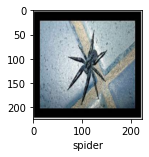

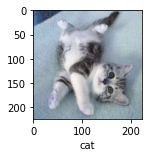

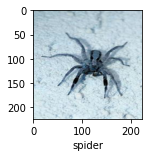

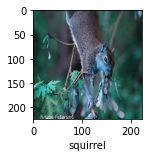

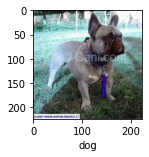

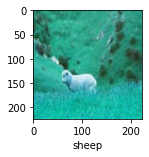

In [14]:
for x in range(6):
    img_show(x_test, y_test, x)

In [15]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))
cnn.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 18, 18, 256)      1024      
 hNormalization)                                                 
                                                        

In [16]:
from keras import optimizers

cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [17]:
history = cnn.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=25, batch_size=32)


Epoch 1/25
491/491 [==============================] - 27s 31ms/step - loss: 2.6267 - accuracy: 0.2499 - val_loss: 2.0660 - val_accuracy: 0.3067
Epoch 2/25
491/491 [==============================] - 14s 28ms/step - loss: 1.8965 - accuracy: 0.3497 - val_loss: 1.9422 - val_accuracy: 0.3159
Epoch 3/25
491/491 [==============================] - 14s 28ms/step - loss: 1.7370 - accuracy: 0.4135 - val_loss: 1.9813 - val_accuracy: 0.3724
Epoch 4/25
491/491 [==============================] - 14s 28ms/step - loss: 1.5925 - accuracy: 0.4705 - val_loss: 2.0976 - val_accuracy: 0.3084
Epoch 5/25
491/491 [==============================] - 14s 28ms/step - loss: 1.4544 - accuracy: 0.5181 - val_loss: 1.9006 - val_accuracy: 0.3734
Epoch 6/25
491/491 [==============================] - 14s 28ms/step - loss: 1.3323 - accuracy: 0.5597 - val_loss: 1.4543 - val_accuracy: 0.5088
Epoch 7/25
491/491 [==============================] - 14s 29ms/step - loss: 1.1736 - accuracy: 0.6105 - val_loss: 1.1837 - val_accuracy:

In [18]:
cnn.evaluate(x_test,y_test,verbose=1)


164/164 [==============================] - 1s 8ms/step - loss: 1.5210 - accuracy: 0.6853


[1.5210107564926147, 0.6852559447288513]

In [19]:
X_new = x_test[:3]
y_proba = cnn.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.51, 0.05, 0.02, 0.01, 0.02, 0.02, 0.06, 0.24, 0.04, 0.02],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]],
      dtype=float32)

In [20]:
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
y_pred

array([8, 0, 8])

In [21]:
np.array(class_names)[y_pred]

array(['spider', 'dog', 'spider'], dtype='<U9')

In [22]:
y_new = y_test[:3]
y_new

array([8, 5, 8])

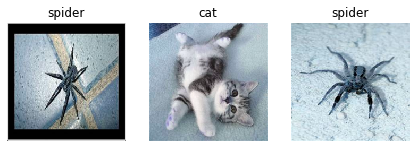

In [23]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

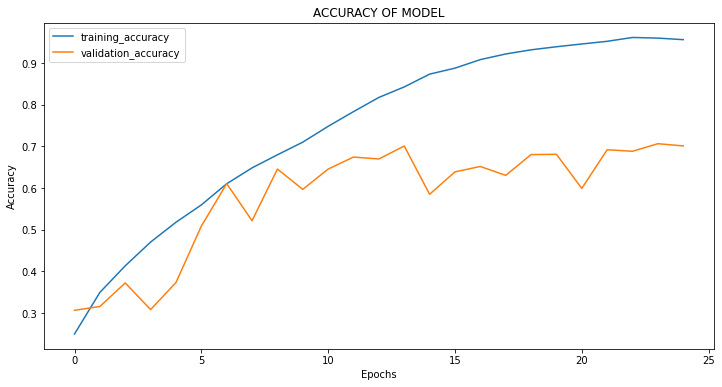

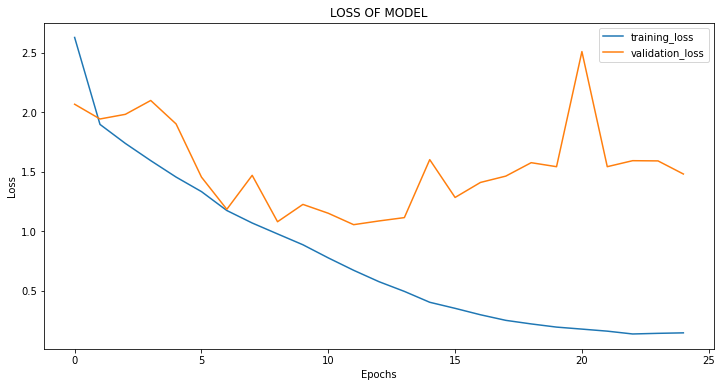

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY OF MODEL")
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS OF MODEL")
plt.legend(['training_loss', 'validation_loss'])
plt.show()